# This Notebook Generates Heatmaps for the Slidedeck

In [43]:
#All other code for data cleaning is the same as the main report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 150

In [3]:
disease = pd.read_csv("Data/Disease Dataset.csv",index_col=False)

In [4]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
disease.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [6]:
disease = disease.rename(columns={"prognosis": "diagnosis"}, errors="raise")

In [7]:
#Phantom column at 133 exists
disease.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'diagnosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [8]:
disease.shape

(4920, 134)

In [9]:
#no missing values except for column #133
disease.isnull().sum()

itching                              0
skin_rash                            0
nodal_skin_eruptions                 0
continuous_sneezing                  0
shivering                            0
chills                               0
joint_pain                           0
stomach_pain                         0
acidity                              0
ulcers_on_tongue                     0
muscle_wasting                       0
vomiting                             0
burning_micturition                  0
spotting_ urination                  0
fatigue                              0
weight_gain                          0
anxiety                              0
cold_hands_and_feets                 0
mood_swings                          0
weight_loss                          0
restlessness                         0
lethargy                             0
patches_in_throat                    0
irregular_sugar_level                0
cough                                0
high_fever               

In [10]:
disease.sum()

itching                                                                         678
skin_rash                                                                       786
nodal_skin_eruptions                                                            108
continuous_sneezing                                                             222
shivering                                                                       108
chills                                                                          798
joint_pain                                                                      684
stomach_pain                                                                    222
acidity                                                                         222
ulcers_on_tongue                                                                108
muscle_wasting                                                                  108
vomiting                                                                    

In [11]:
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [12]:
#drop phantom column 133
disease.dropna(how='all', axis='columns')

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0                  0         0                    0                    0   
1                  0         0                    0                    0   
2                  0         0                    0                    0   
3                  0         0                    0                    0   
4                  0         0                    0                    0   
...              ...       ...                  ...                  ...   
4915               0         1                    0                    0   
4916               0         0                    0                    0   
4917               0         0                    1                    0   
4918               0         0                    0                    0   
4919               0         0                    0                    0   

      fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0           0            0        0                     0            0   
1           0            0        0                     0            0   
2           0            0        0                     0            0   
3           0            0        0                     0            0   
4           0            0        0                     0            0   
...       ...          ...      ...                   ...          ...   
4915        0            0        0                     0            0   
4916        0            0        0                     0            0   
4917        0            0        0                     0            0   
4918        0            0        0                     0            0   
4919        0            0        0                     0            0   

      weight_loss  restlessness  lethargy  patches_in_throat  \
0               0             0         0                  0   
1               0             0         0                  0   
2               0             0         0                  0   
3               0             0         0                  0   
4               0             0         0                  0   
...   

In [13]:
#unnamed column still appears
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [14]:
#found this solution to rename with dict, then drop
disease.rename({"Unnamed: 133":"a"}, axis="columns", inplace=True)
disease.drop(["a"], axis=1, inplace=True)

In [15]:
#finally gone
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [16]:
disease.fluid_overload.value_counts()

0    4920
Name: fluid_overload, dtype: int64

In [17]:
disease['fluid_overload.1'].value_counts()

0    4806
1     114
Name: fluid_overload.1, dtype: int64

In [18]:
#drop fluid_overload and rename fluid_overload.1 to fluid_overload
disease = disease.drop(['fluid_overload'], axis = 1)
disease = disease.rename(columns={'fluid_overload.1': 'fluid_overload'}, errors="raise")

In [19]:
disease.diagnosis.value_counts()

Hypothyroidism                             120
Arthritis                                  120
Hepatitis D                                120
Jaundice                                   120
Cervical spondylosis                       120
Alcoholic hepatitis                        120
hepatitis A                                120
AIDS                                       120
Diabetes                                   120
Dengue                                     120
Varicose veins                             120
Osteoarthristis                            120
Heart attack                               120
Urinary tract infection                    120
Gastroenteritis                            120
Tuberculosis                               120
Hypertension                               120
Chronic cholestasis                        120
(vertigo) Paroymsal  Positional Vertigo    120
Pneumonia                                  120
GERD                                       120
Dimorphic hem

In [20]:
#copy values of diagnosis to new column triage
disease['triage'] = disease['diagnosis'].values

In [21]:
disease.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_o

In [22]:
#map triage categories from diagnosis to triage column

#triage category can be changed using the dictionary

#1 Immediate Care Need
#2 Care Needed within a week
#3 Address at next visit
#4 Need more information for triage

disease = disease.replace({'triage': {'Paralysis (brain hemorrhage)':1,'Pneumonia':1,'Bronchial Asthma':1,'Tuberculosis':1,
                            'Typhoid':1, 'Chicken pox':1,'Heart attack':1,'Drug Reaction':1, 'Malaria':1, 'Dengue':1,
                            'Fungal infection': 2,'Hepatitis E':2,'Alcoholic hepatitis':2, 'Hepatitis B':2,'Hepatitis C':2,
                            'hepatitis A':2, 'Urinary tract infection':2, 'AIDS':2,'Allergy':4,'Psoriasis':3,'Acne':3,
                           'Arthritis':3,'(vertigo) Paroymsal  Positional Vertigo':3,'Dimorphic hemmorhoids(piles)':3,
                           'Osteoarthristis':3,'GERD':3,'Migraine':3,'Hyperthyroidism':3,'Varicose veins':3,'Hepatitis D':1,
                           'Common Cold':4,'Impetigo':4,'Hypertension ':4,'Cervical spondylosis':4,'Diabetes ':4,
                            'Gastroenteritis':4,'Jaundice':4,'Chronic cholestasis':4,'Peptic ulcer diseae':4,'Hypoglycemia':4,
                                      'Hypothyroidism':3}})

In [23]:
#confirm all triage changes have been made
disease.triage.value_counts()

3    1320
1    1320
4    1320
2     960
Name: triage, dtype: int64

In [24]:
disease.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_o

In [25]:
disease.shape

(4920, 133)

In [26]:
#table of all diagnoses for report
df_freq = pd.crosstab(disease['diagnosis'], columns='count')
df_freq

col_0                                    count
diagnosis                                     
(vertigo) Paroymsal  Positional Vertigo    120
AIDS                                       120
Acne                                       120
Alcoholic hepatitis                        120
Allergy                                    120
Arthritis                                  120
Bronchial Asthma                           120
Cervical spondylosis                       120
Chicken pox                                120
Chronic cholestasis                        120
Common Cold                                120
Dengue                                     120
Diabetes                                   120
Dimorphic hemmorhoids(piles)               120
Drug Reaction                              120
Fungal infection                           120
GERD                                       120
Gastroenteritis                            120
Heart attack                               120
Hepatitis B                                120
Hepatitis C                                120
Hepatitis D                                120
Hepatitis E                                120
Hypertension                               120
Hyperthyroidism                            120
Hypoglycemia                               120
Hypothyroidism                             120
Impetigo                                   120
Jaundice                                   120
Malaria                                    120
Migraine                                   120
Osteoarthristis                            120
Paralysis (brain hemorrhage)               120
Peptic ulcer diseae                        120
Pneumonia                                  120
Psoriasis                                  120
Tuberculosis                               120
Typhoid                                    120
Urinary tract infection                    120
Varicose veins                             120
hepatitis A                                120

In [27]:
#table of all symptoms for report
disease.iloc[:,:131].sum()

itching                            678
skin_rash                          786
nodal_skin_eruptions               108
continuous_sneezing                222
shivering                          108
chills                             798
joint_pain                         684
stomach_pain                       222
acidity                            222
ulcers_on_tongue                   108
muscle_wasting                     108
vomiting                          1914
burning_micturition                216
spotting_ urination                108
fatigue                           1932
weight_gain                        114
anxiety                            114
cold_hands_and_feets               114
mood_swings                        228
weight_loss                        456
restlessness                       228
lethargy                           456
patches_in_throat                  108
irregular_sugar_level              114
cough                              564
high_fever               

# Cramers Tests Heatmaps

In [28]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [29]:
rows= []

for var1 in disease:
  col = []
  for var2 in disease :
    cramers =cramers_V(disease[var1], disease[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = disease.columns, index =disease.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

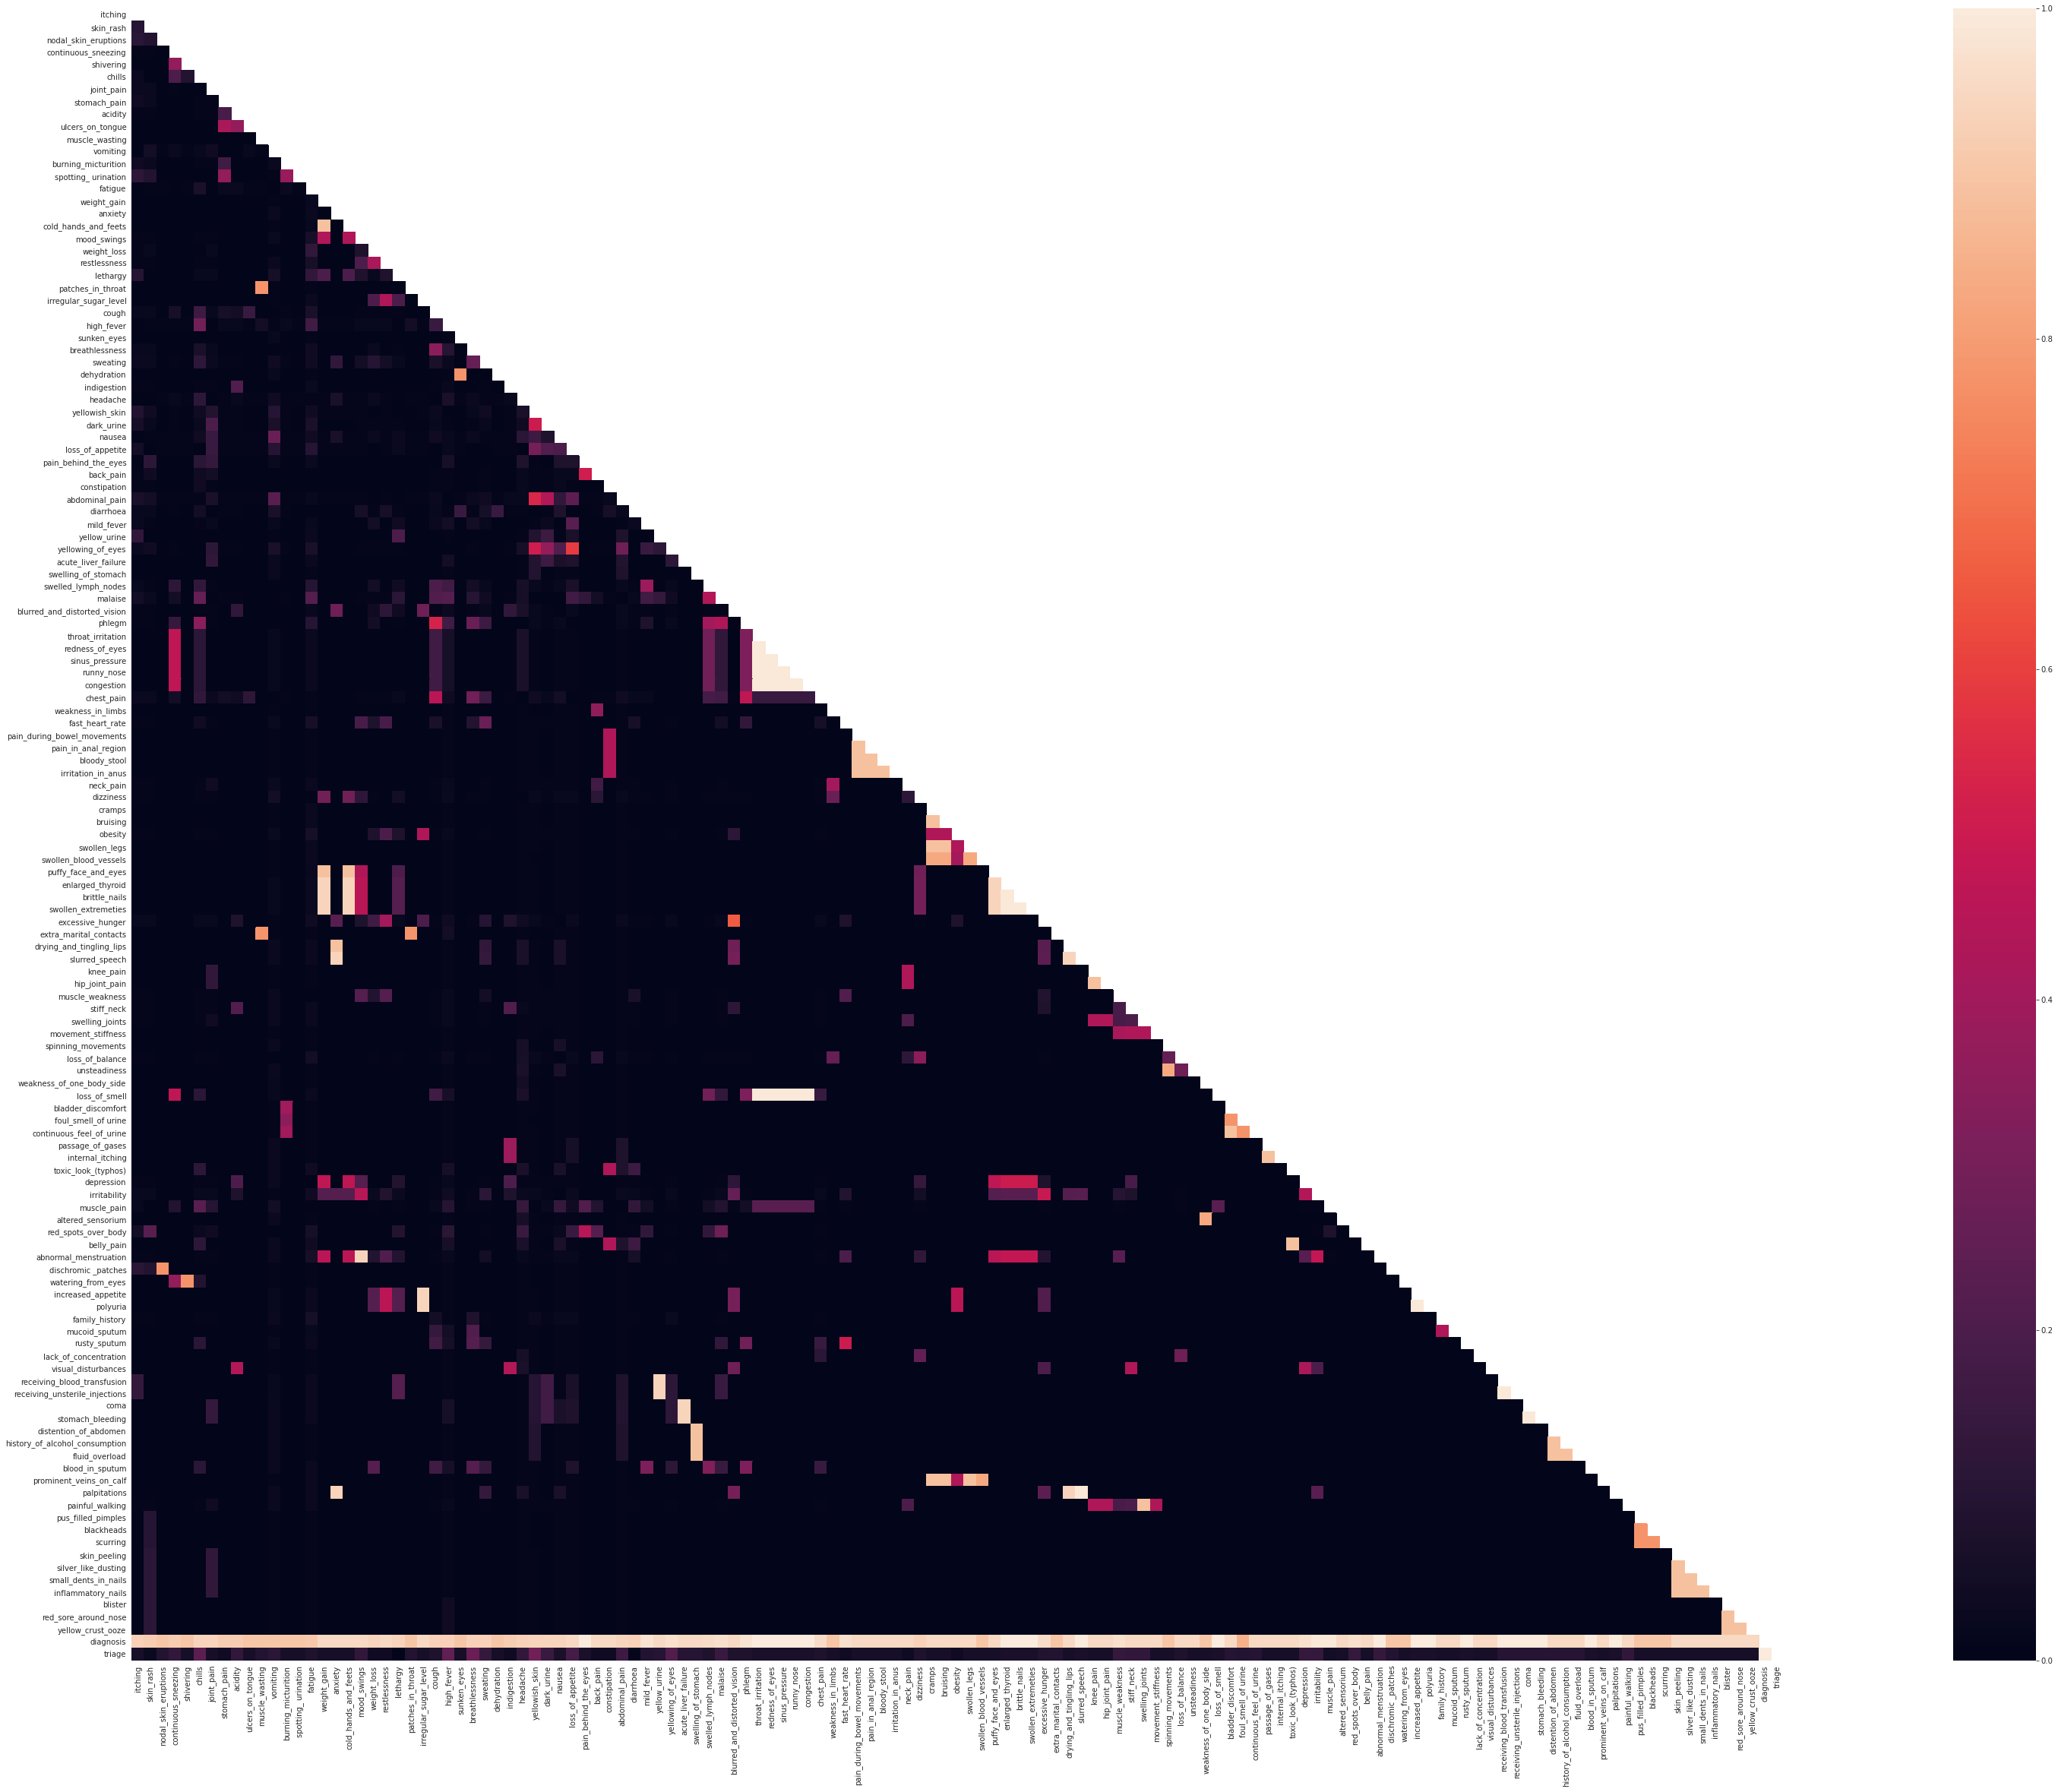

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(80,40))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True, xticklabels =True, yticklabels =True)

plt.show()

In [31]:
# We will drop features that have a cramers score higher than ~.4
disease_clean = disease.drop(['weight_gain','anxiety','cold_hands_and_feets','yellow_urine','acute_liver_failure',
                        'loss_of_smell','fluid_overload','swelling_of_stomach','redness_of_eyes','sinus_pressure',
                       'runny_nose','congestion','prominent_veins_on_calf','brittle_nails','swollen_extremeties',
                       'high_fever','breathlessness','loss_of_appetite','yellowish_skin','vomiting','yellowing_of_eyes',
                       'itching','abdominal_pain','chills','sweating','headache','dark_urine','nausea','weight_loss',
                       'dizziness','muscle_pain','malaise','joint_pain','mild_fever','red_spots_over_body','palpitations',
                       'irregular_sugar_level','abnormal_menstruation','swelling_joints','coma','increased_appetite',
                        'enlarged_thyroid','receiving_blood_transfusion','receiving_unsterile_injections','skin_peeling',
                       'blister','pain_in_anal_region','drying_and_tingling_lips','toxic_look_(typhos)','excessive_hunger',
                       'cramps','bruising','irritation_in_anus','bloody_stool','swollen_blood_vessels','spinning_movements',
                       'movement_stiffness','yellow_crust_ooze','distention_of_abdomen','small_dents_in_nails','scurring',
                        'visual_disturbances','extra_marital_contacts','inflammatory_nails','hip_joint_pain','altered_sensorium',
                       'continuous_feel_of_urine','internal_itching','dischromic _patches','shivering','muscle_wasting',
                       'blackheads','sunken_eyes','bladder_discomfort','cough','phlegm','swelled_lymph_nodes','ulcers_on_tongue',
                       'acidity','painful_walking','obesity','constipation', 'throat_irritation','back_pain','mood_swings',
                        'restlessness','fast_heart_rate','depression','rusty_sputum','neck_pain','spotting_ urination',
                       'mucoid_sputum','watering_from_eyes','passage_of_gases'],axis = 1)

In [32]:
rows= []

for var1 in disease_clean:
  col = []
  for var2 in disease_clean:
    cramers =cramers_V(disease_clean[var1], disease_clean[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
clean_heatmap = pd.DataFrame(cramers_results, columns = disease_clean.columns, index =disease_clean.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

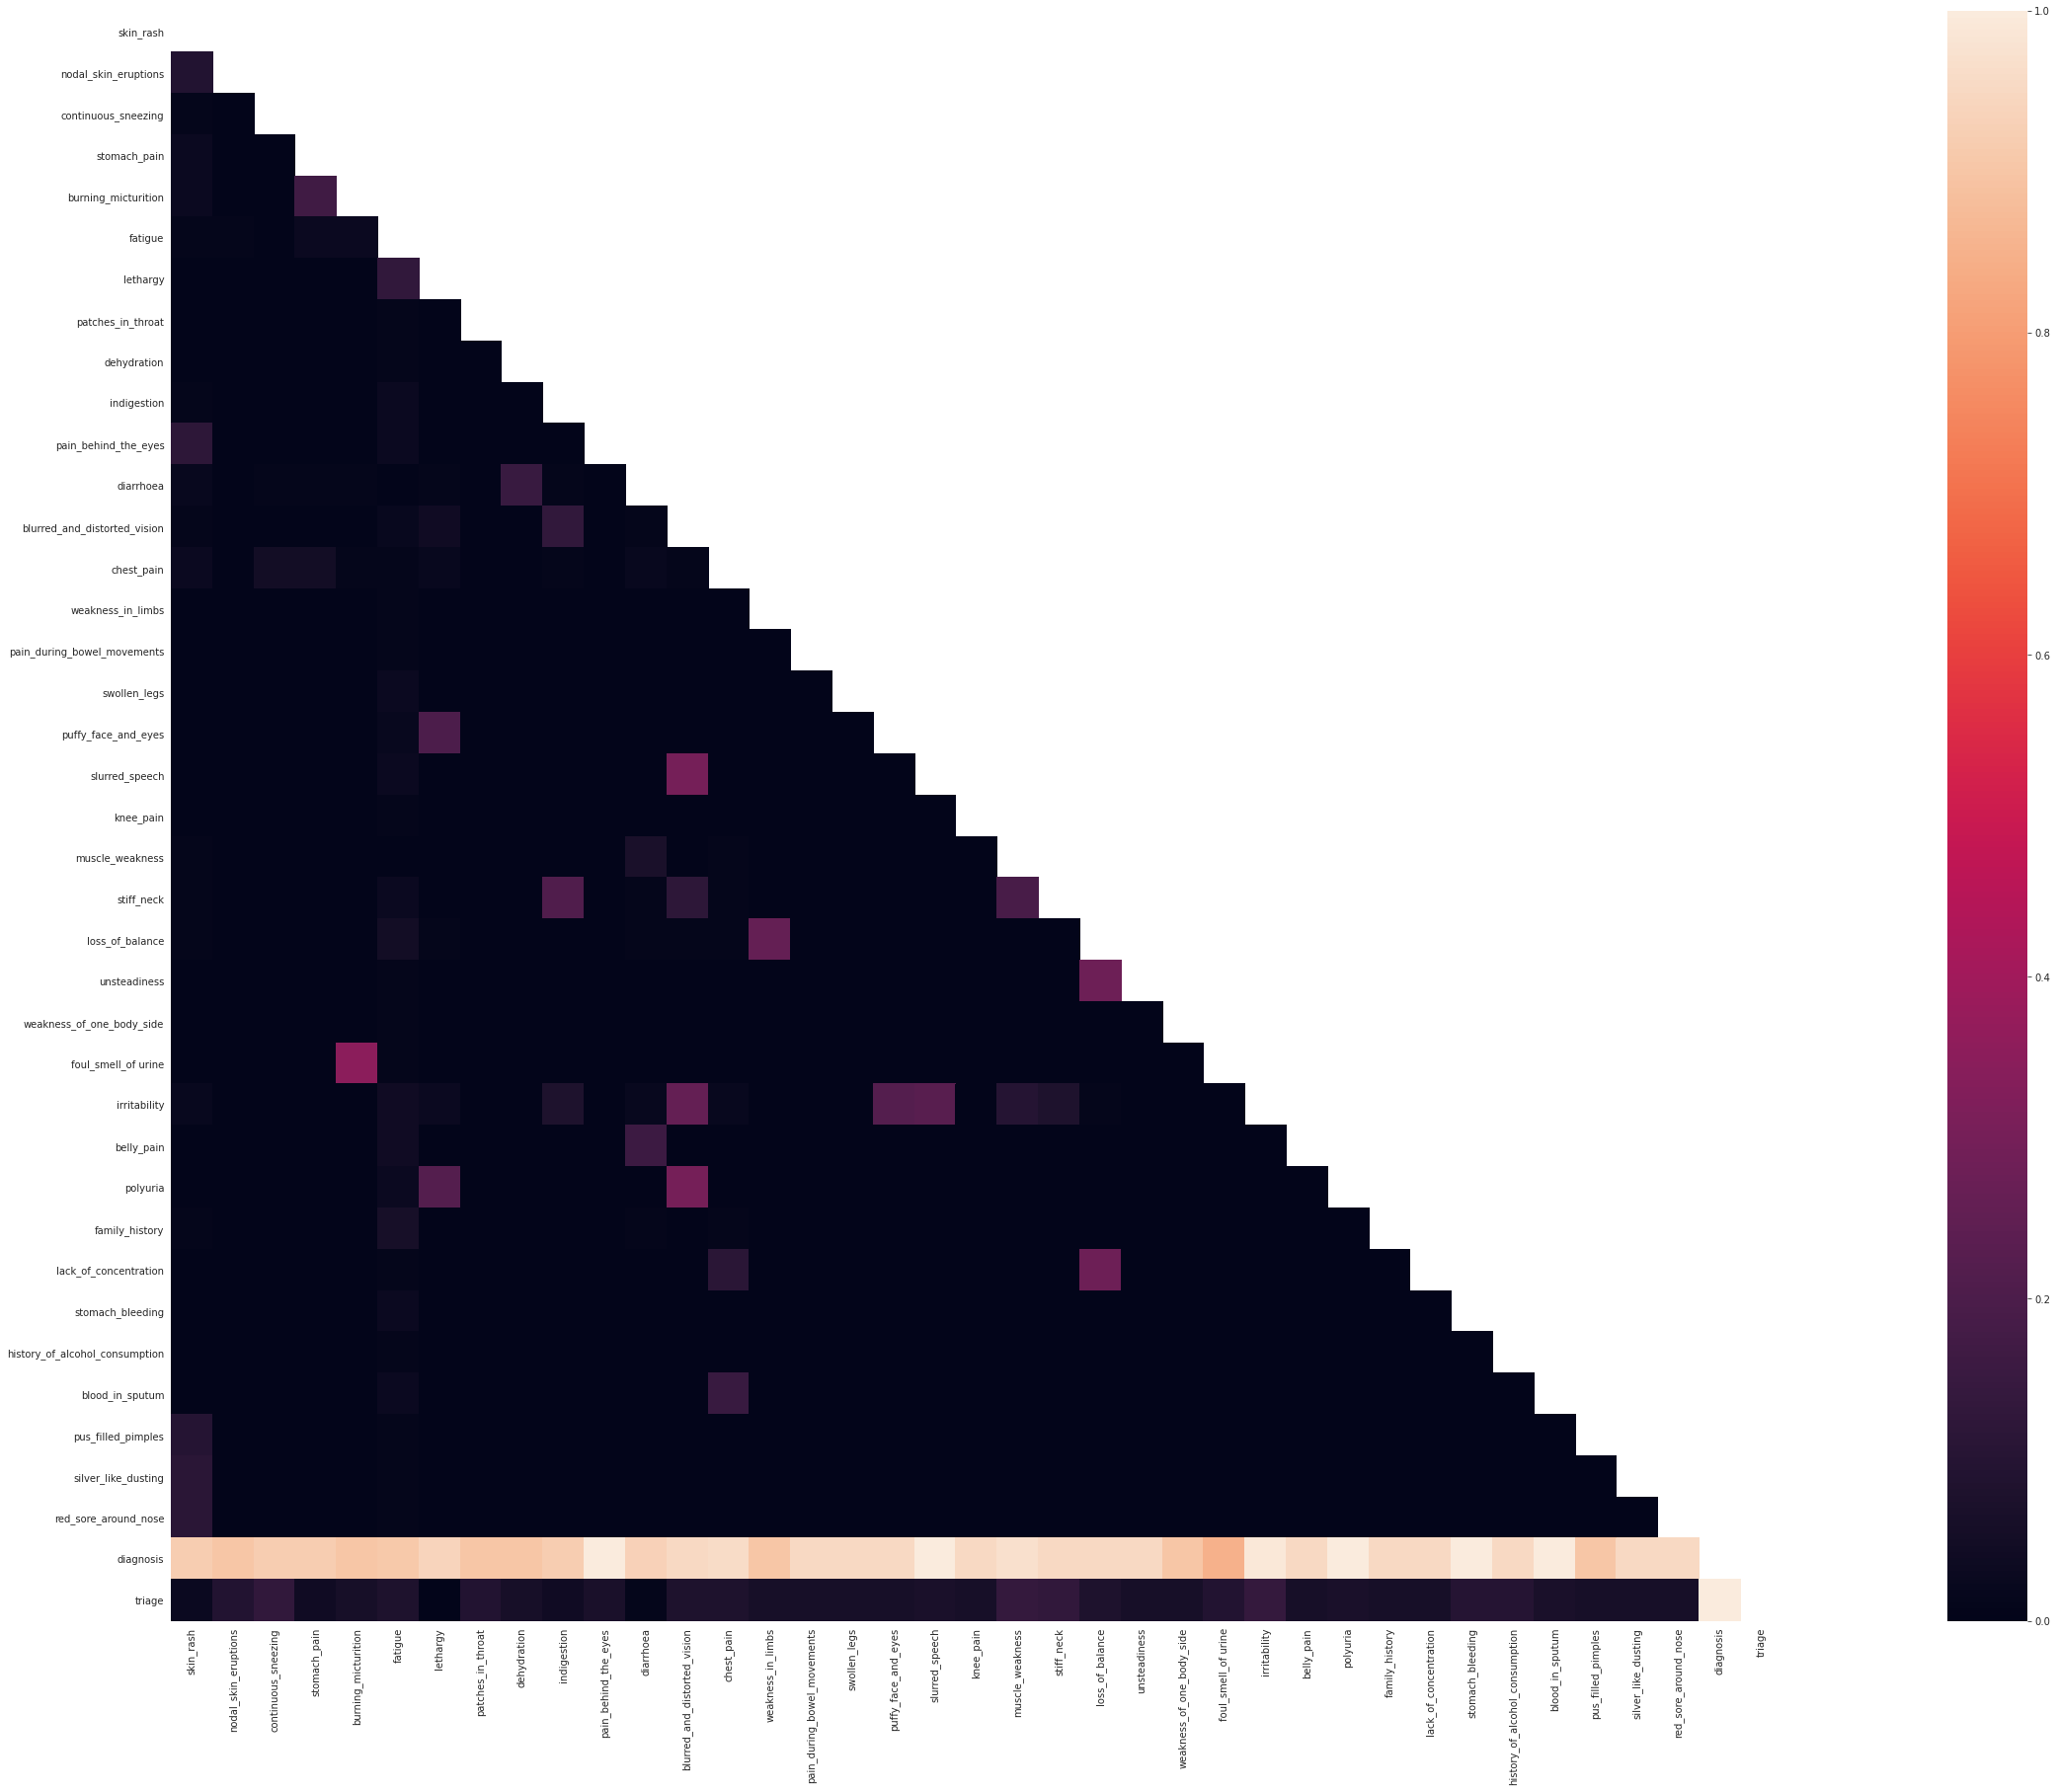

In [33]:
plt.figure(figsize=(60,30))

mask = np.zeros_like(clean_heatmap, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(clean_heatmap, mask=mask,vmin=0., vmax=1, square=True, xticklabels =True, yticklabels =True)
plt.show()

In [34]:
disease_example1 = disease.drop(['triage', 'diagnosis'],axis = 1)

In [35]:
# prior heatmap for report
rows= []

for var1 in disease_example1:
  col = []
  for var2 in disease_example1:
    cramers =cramers_V(disease_example1[var1], disease_example1[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
prior_heatmap = pd.DataFrame(cramers_results, columns = disease_example1.columns, index =disease_example1.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

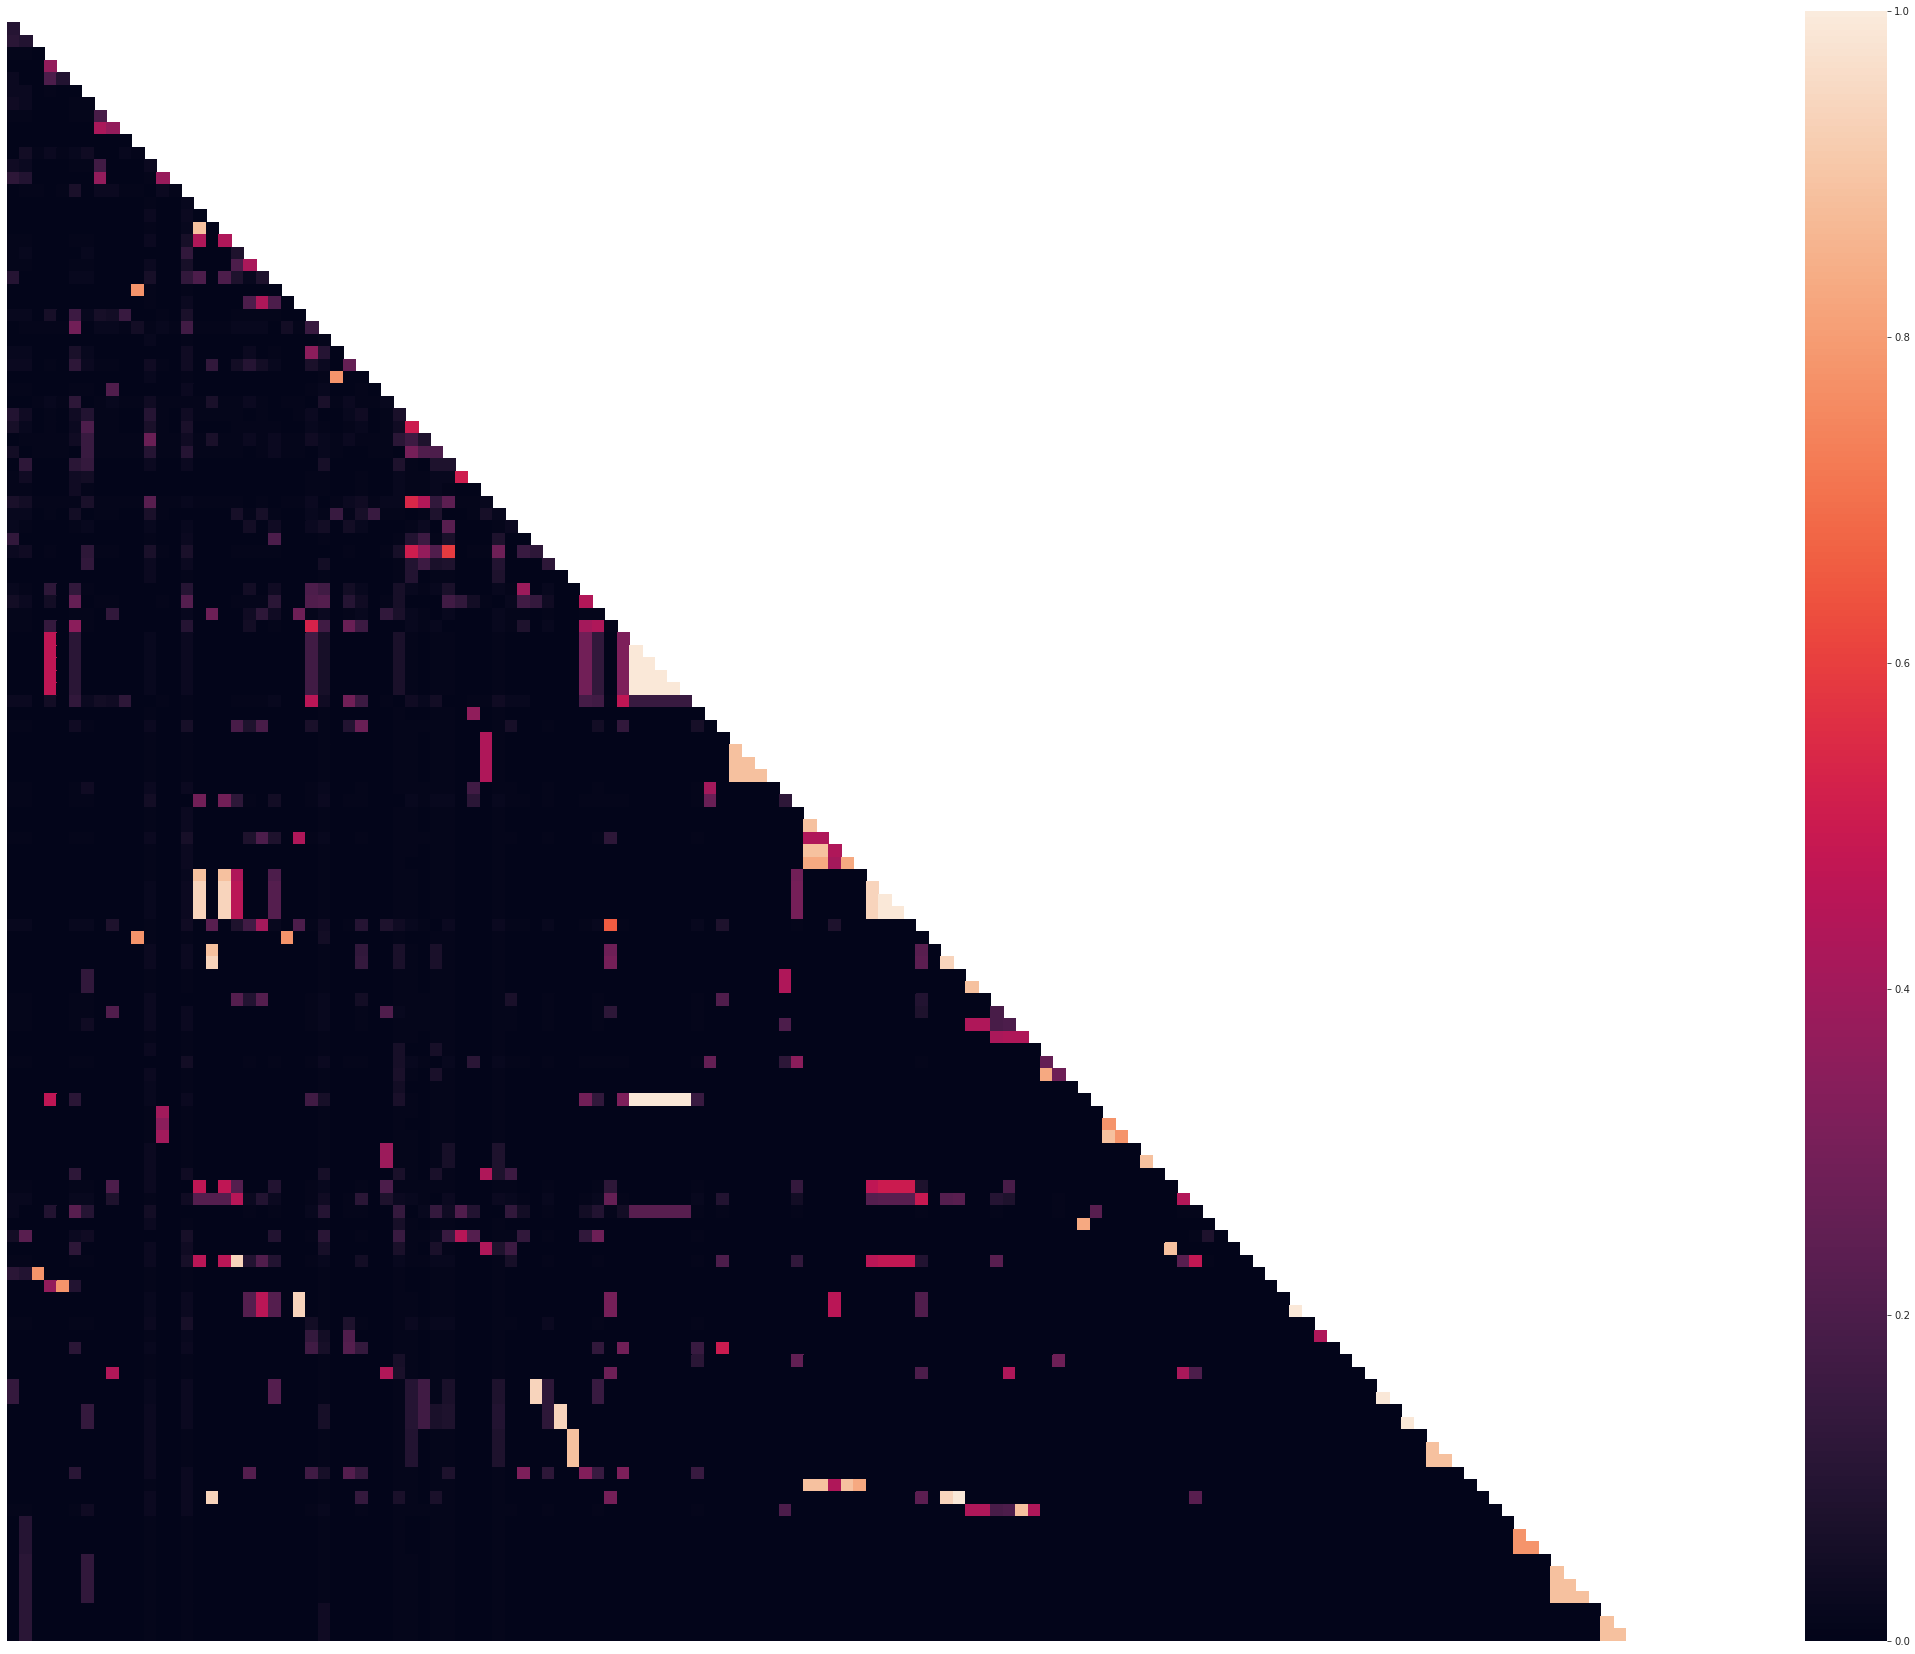

In [36]:
plt.figure(figsize=(60,30))

mask = np.zeros_like(prior_heatmap, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(prior_heatmap, mask=mask,vmin=0., vmax=1, square=True, xticklabels =False, yticklabels =False)
plt.show()

In [37]:
disease_example2 = disease.drop(['weight_gain','cold_hands_and_feets','triage', 'diagnosis'],axis = 1)

In [38]:
# example heatmap for report
rows= []

for var1 in disease_example2:
  col = []
  for var2 in disease_example2 :
    cramers =cramers_V(disease_example2[var1], disease_example2[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
remove_cluster_heatmap = pd.DataFrame(cramers_results, columns = disease_example2.columns, index =disease_example2.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

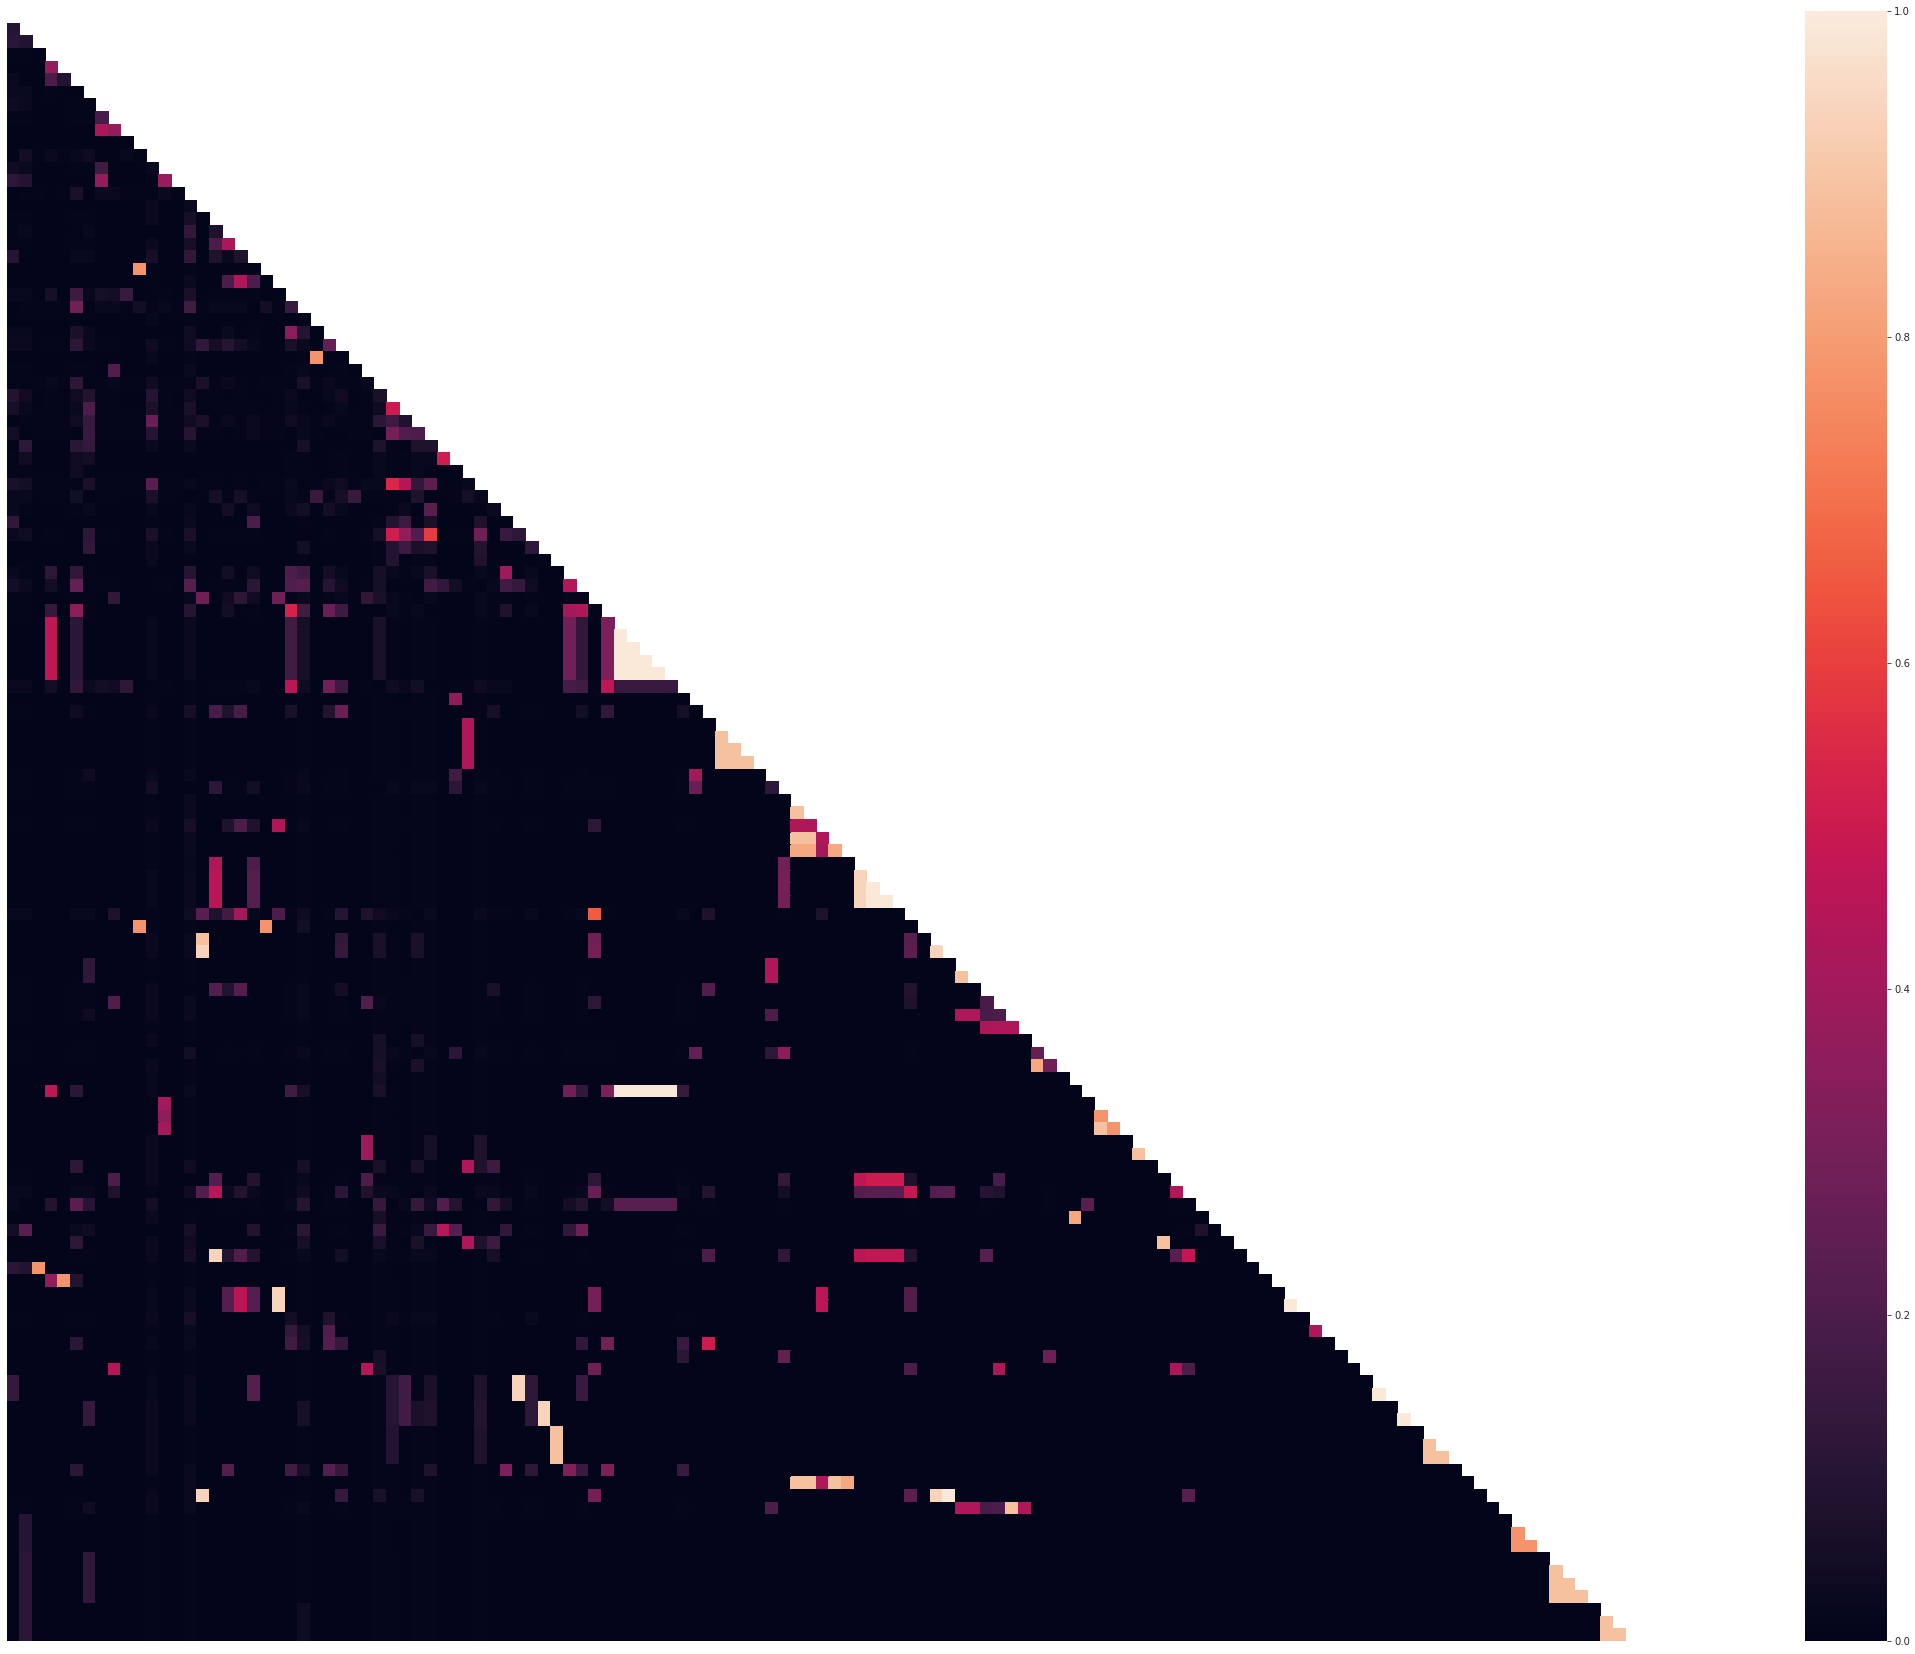

In [39]:
plt.figure(figsize=(60,30))

mask = np.zeros_like(remove_cluster_heatmap, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(remove_cluster_heatmap, mask=mask,vmin=0., vmax=1, square=True, xticklabels =False, yticklabels =False)
plt.show()

In [40]:
disease_example3 = disease.drop(['weight_gain','anxiety','cold_hands_and_feets','yellow_urine','acute_liver_failure',
                        'loss_of_smell','fluid_overload','swelling_of_stomach','redness_of_eyes','sinus_pressure',
                       'runny_nose','congestion','prominent_veins_on_calf','brittle_nails','swollen_extremeties',
                       'high_fever','breathlessness','loss_of_appetite','yellowish_skin','vomiting','yellowing_of_eyes',
                       'itching','abdominal_pain','chills','sweating','headache','dark_urine','nausea','weight_loss',
                       'dizziness','muscle_pain','malaise','joint_pain','mild_fever','red_spots_over_body','palpitations',
                       'irregular_sugar_level','abnormal_menstruation','swelling_joints','coma','increased_appetite',
                        'enlarged_thyroid','receiving_blood_transfusion','receiving_unsterile_injections','skin_peeling',
                       'blister','pain_in_anal_region','drying_and_tingling_lips','toxic_look_(typhos)','excessive_hunger',
                       'cramps','bruising','irritation_in_anus','bloody_stool','swollen_blood_vessels','spinning_movements',
                       'movement_stiffness','yellow_crust_ooze','distention_of_abdomen','small_dents_in_nails','scurring',
                        'visual_disturbances','extra_marital_contacts','inflammatory_nails','hip_joint_pain','altered_sensorium',
                       'continuous_feel_of_urine','internal_itching','dischromic _patches','shivering','muscle_wasting',
                       'blackheads','sunken_eyes','bladder_discomfort','cough','phlegm','swelled_lymph_nodes','ulcers_on_tongue',
                       'acidity','painful_walking','obesity','constipation', 'throat_irritation','back_pain','mood_swings',
                        'restlessness','fast_heart_rate','depression','rusty_sputum','neck_pain','spotting_ urination',
                       'mucoid_sputum','watering_from_eyes','passage_of_gases','triage', 'diagnosis'],axis = 1)                     

In [41]:
# final heatmap for report
rows= []

for var1 in disease_example3:
  col = []
  for var2 in disease_example3:
    cramers =cramers_V(disease_example3[var1], disease_example3[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
after_heatmap = pd.DataFrame(cramers_results, columns = disease_example3.columns, index =disease_example3.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

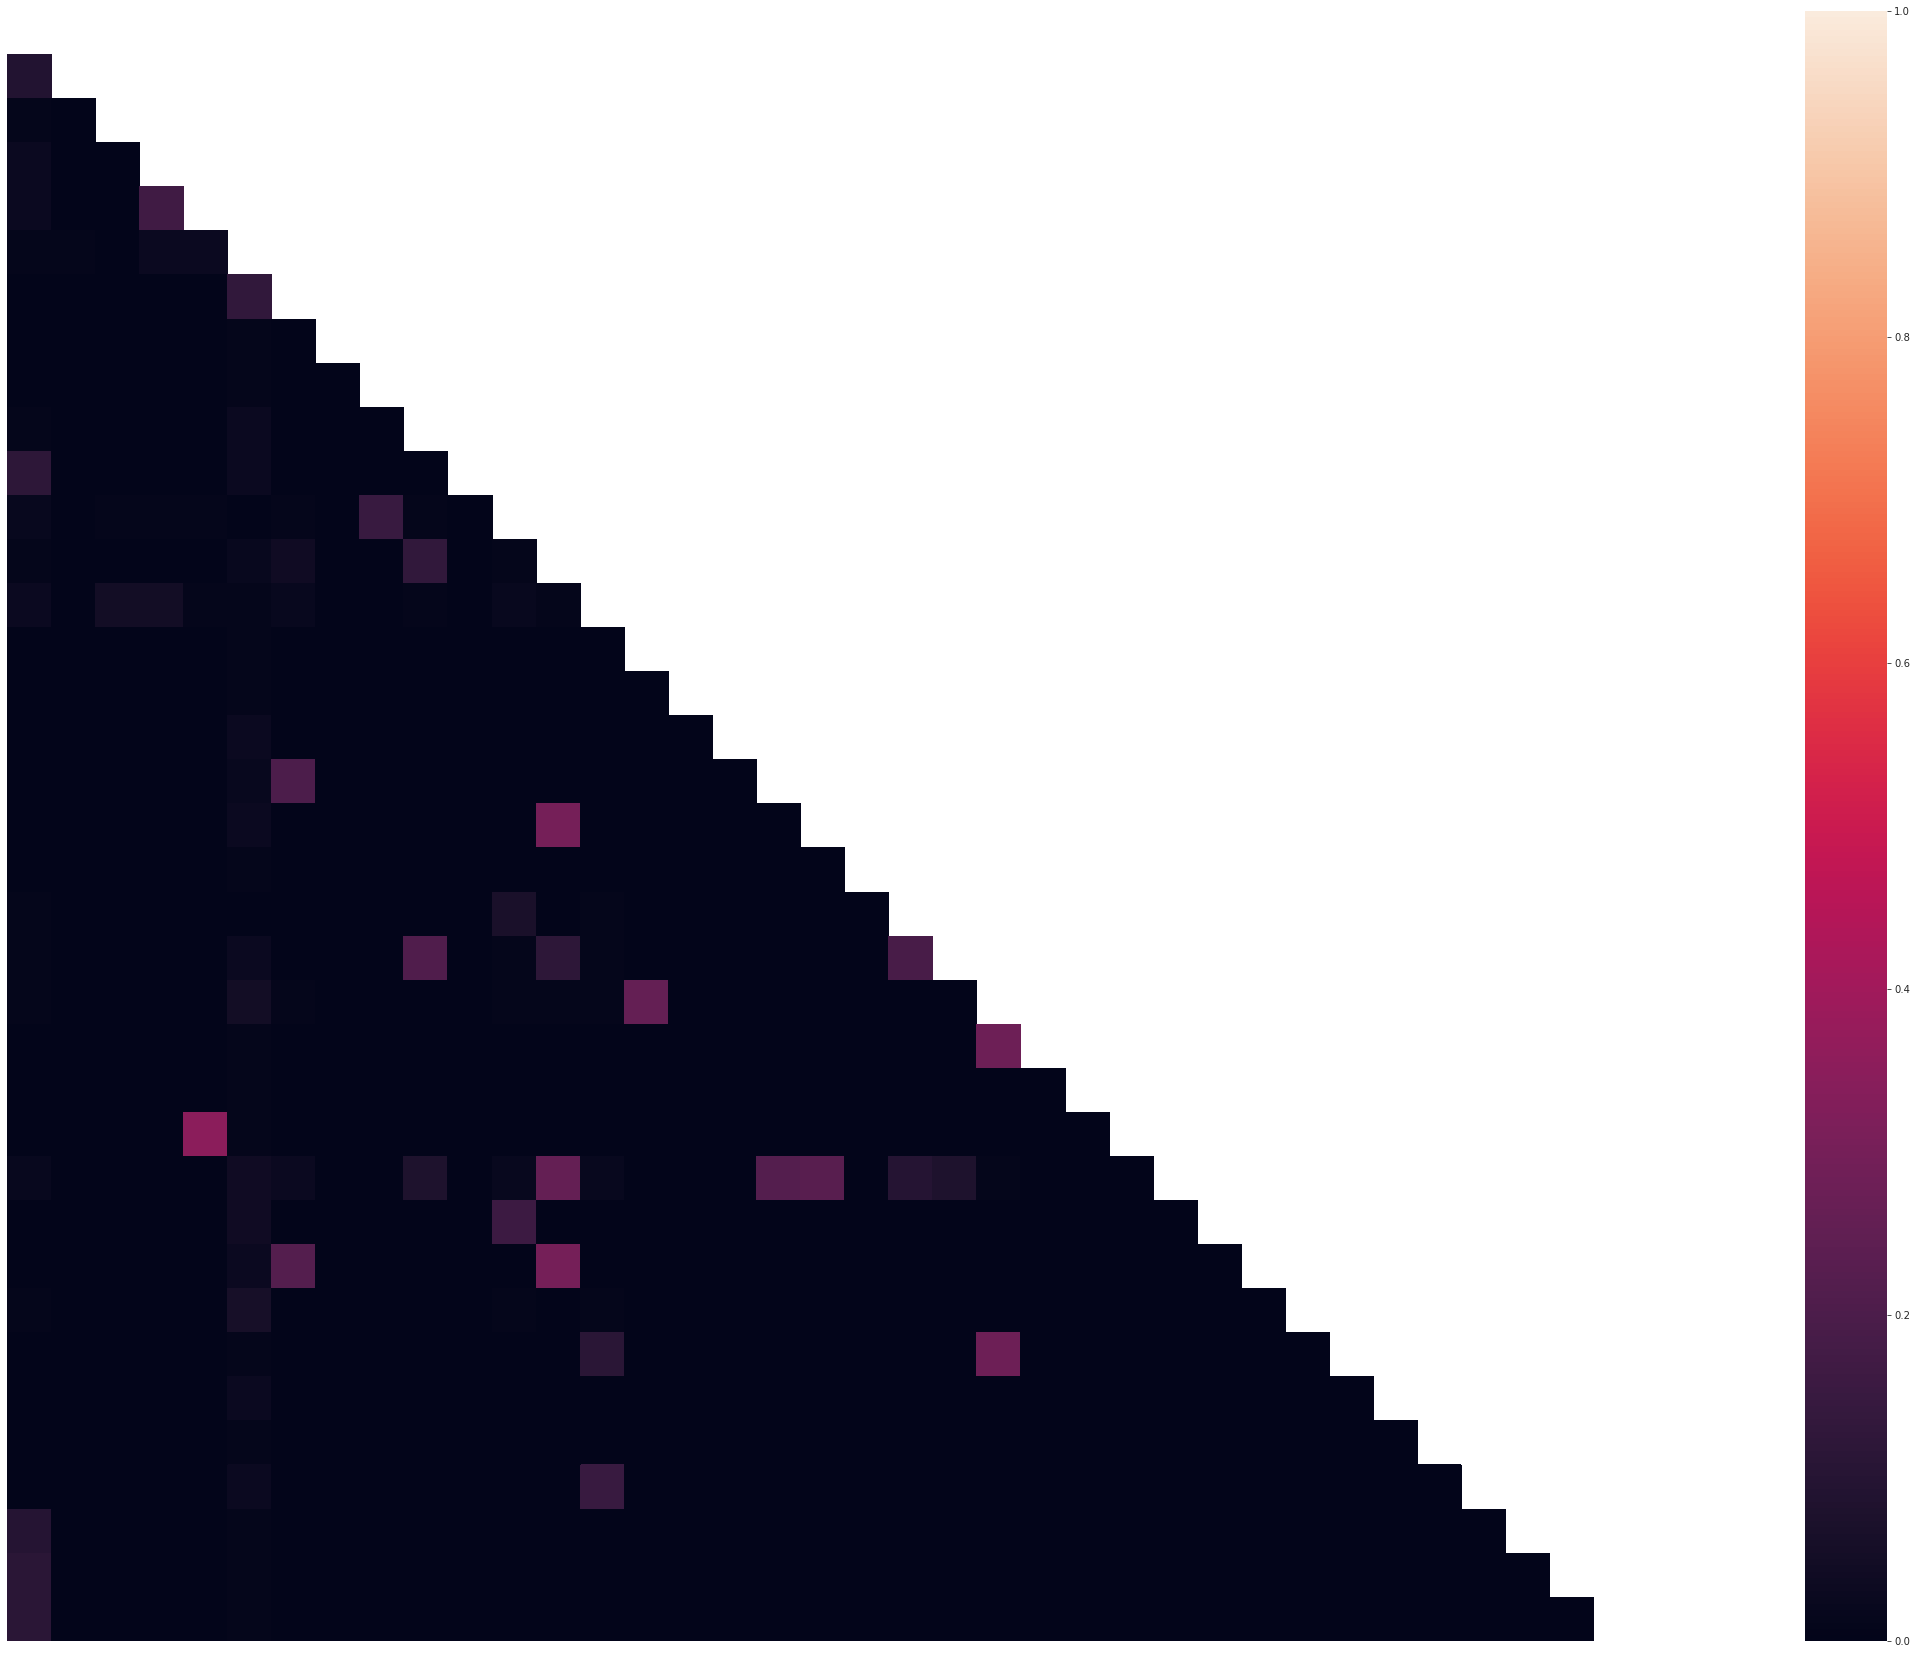

In [42]:
plt.figure(figsize=(60,30))

mask = np.zeros_like(after_heatmap, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(after_heatmap, mask=mask,vmin=0., vmax=1, square=True, xticklabels =False, yticklabels =False)
plt.show()